In [2]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

INTERIM_PATH="data/interim/ENIGH"

In [3]:
os.chdir('..')

In [4]:
df_2022=pd.read_csv(f"{INTERIM_PATH}/2022.csv")
df_2020=pd.read_csv(f"{INTERIM_PATH}/2020.csv")
df_2018=pd.read_csv(f"{INTERIM_PATH}/2018.csv")
df_2016=pd.read_csv(f"{INTERIM_PATH}/2016.csv")

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_31541/2970915959.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(f"{INTERIM_PATH}/2022.csv")
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_31541/2970915959.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020=pd.read_csv(f"{INTERIM_PATH}/2020.csv")


In [5]:
def in_sonora(df):
    in_sonora= (df['folioviv']>=2600000000)&(df['folioviv']<2700000000)
    return in_sonora

def is_literate(df):
    if isinstance(df['alfabetism'], (int, float, complex)):
        is_illiterate=df['alfabetism']==1
    else:
        is_illiterate=df['alfabetism']=='1'
    return is_illiterate

# Grades:
def last_grade(df,grade):

    last_grade_dictionary={
    'preschool':1,
    'informal nursery school':2,
    'public daycare':3,
    'other daycare':5,
    'first grade':6,
    'second grade':7,
    'technical career with second grade':8,
    'highschool':9,
    'technical career with highschool':10,
    'normal':11,
    'professional':12,
    'masters or phd':13
    }

    if isinstance(df['nivel'], (int, float, complex)):
        last_grade=df['nivel']==last_grade_dictionary[grade]
    else:
        last_grade=df['nivel']==f'{last_grade_dictionary[grade]}'
    return last_grade

def approved_grade(df,grade):
    approved_grade_dictionary={
    'none':0,
    'preschool':1,
    'first grade':2,
    'second grade':3,
    'highschool':4,
    'technical career':6,
    'professional':7,
    'masters':8,
    'phd':9
    }
        
    if isinstance(df['nivelaprob'], (int, float, complex)):
        approved_grade=df['nivelaprob']==approved_grade_dictionary[grade]
    else:
        approved_grade=df['nivelaprob']==f'{approved_grade_dictionary[grade]}'
    return approved_grade
    
def is_assisting_school(df):
    if isinstance(df['asis_esc'], (int, float, complex)):
        is_assisting_school=df['asis_esc']==1
    else:
        is_assisting_school=df['asis_esc']=='1'
    return is_assisting_school

def is_generation(generation,df):
    is_generation=df['generacion']==generation
    return is_generation


In [6]:
print(f"Amount of data obtained in Sonora in the year of 2016: {len(df_2016[in_sonora(df_2016)])}")
print(f"Amount of data obtained in Sonora in the year of 2018: {len(df_2018[in_sonora(df_2018)])}")
print(f"Amount of data obtained in Sonora in the year of 2020: {len(df_2020[in_sonora(df_2020)])}")
print(f"Amount of data obtained in Sonora in the year of 2022: {len(df_2022[in_sonora(df_2022)])}")

Amount of data obtained in Sonora in the year of 2016: 184
Amount of data obtained in Sonora in the year of 2018: 79
Amount of data obtained in Sonora in the year of 2020: 155
Amount of data obtained in Sonora in the year of 2022: 12332


In [7]:
print(f"Amount of data obtained in Mexico in the year of 2016: {len(df_2016)}")
print(f"Amount of data obtained in Mexico in the year of 2018: {len(df_2018)}")
print(f"Amount of data obtained in Mexico in the year of 2020: {len(df_2020)}")
print(f"Amount of data obtained in Mexico in the year of 2022: {len(df_2022)}")

Amount of data obtained in Mexico in the year of 2016: 3560
Amount of data obtained in Mexico in the year of 2018: 4043
Amount of data obtained in Mexico in the year of 2020: 6836
Amount of data obtained in Mexico in the year of 2022: 397182


# Graphs

## Barplots

In [13]:
df_2022[ 
    ['folioviv','numren','edad','nivel','nivelaprob','alfabetism','grado','gradoaprob','ing_tri']
]

,folioviv,numren,edad,nivel,nivelaprob,alfabetism,grado,gradoaprob,ing_tri
0,100005002,1,91,,2,1,,4,7434.78
1,100005002,2,48,,4,1,,3,33749.99
2,100005002,2,48,,4,1,,3,1956.52
3,100005002,3,13,07,3,1,2,1,391.30
4,100005002,3,13,07,3,1,2,1,978.26
...,...,...,...,...,...,...,...,...,...
397177,3260797908,2,50,,2,1,,6,2543.47
397178,3260797909,1,37,,2,1,,6,26413.04
397179,3260797910,1,63,,3,1,,3,136709.99
397180,3260797912,1,29,,7,1,,5,24358.69


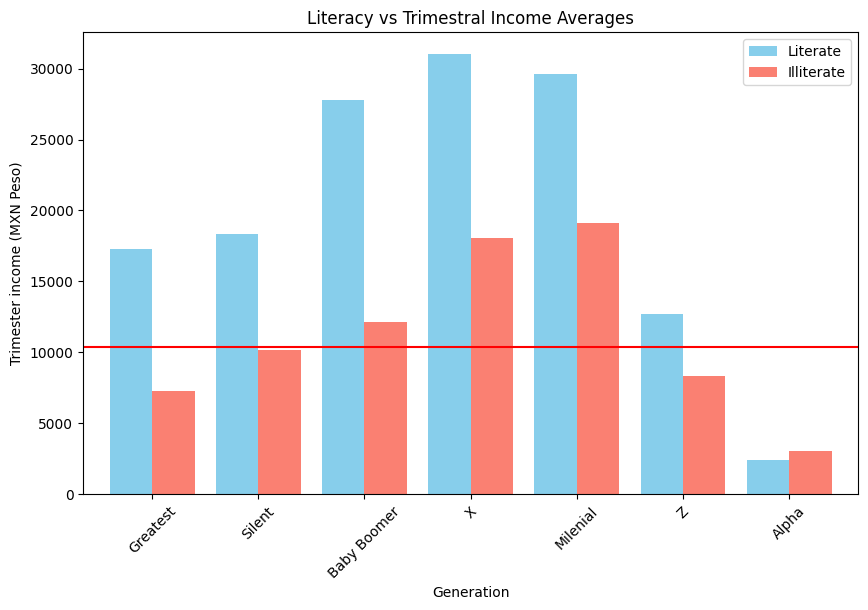

In [51]:
df=df_2022.drop_duplicates(subset=[ 'folioviv','foliohog','numren','sexo','edad','parentesco'], keep='first', inplace=False)

illiterate=df[~is_literate(df)]
literate=df[is_literate(df)]

number_of_literate_people=len(df[is_literate(df)])
number_of_illiterate_people=len(df[~is_literate(df)])
total_of_people=len(df)
valor='ing_tri_individual_total'

generation_literate=literate.groupby('generacion',as_index=True)[valor].mean()
generation_illiterate=illiterate.groupby('generacion',as_index=True)[valor].mean()

valor_promedio = df[valor].mean()
minimum_trimester_salary=172.87 * 60 # daily minimum wage X business days in trimester


generation = pd.DataFrame({
    'Literate':generation_literate,
    'Illiterate': generation_illiterate
})

category_order=['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha'] 
generation.index = pd.CategoricalIndex(generation.index, categories=category_order, ordered=True)
generation = generation.sort_index()


# Plot with Pandas
ax = generation.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
#plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
plt.axhline(minimum_trimester_salary, color='red', linestyle='solid', label='Promedio Global')

ax.set_ylabel('Trimester income (MXN Peso)')
ax.set_xlabel('Generation')

ax.set_title('Literacy vs Trimestral Income Averages')
plt.xticks(rotation=45)
plt.show()

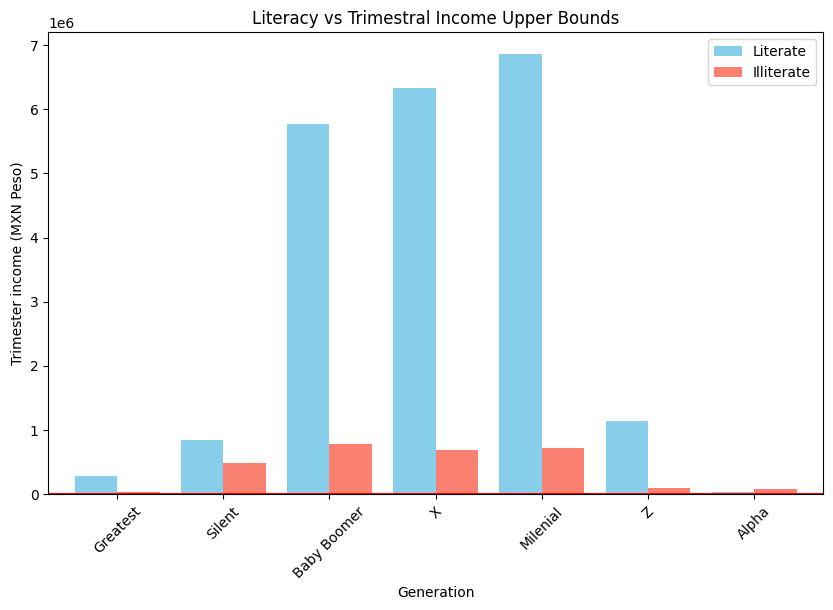

In [52]:
df=df_2022.drop_duplicates(subset=[ 'folioviv','foliohog','numren','sexo','edad','parentesco'], keep='first', inplace=False)

illiterate=df[~is_literate(df)]
literate=df[is_literate(df)]

number_of_literate_people=len(df[is_literate(df)])
number_of_illiterate_people=len(df[~is_literate(df)])
total_of_people=len(df)
valor='ing_tri_individual_total'

generation_literate=literate.groupby('generacion',as_index=True)[valor].max()
generation_illiterate=illiterate.groupby('generacion',as_index=True)[valor].max()

valor_promedio = df[valor].mean()
minimum_trimester_salary=172.87 * 60 # daily minimum wage X business days in trimester


generation = pd.DataFrame({
    'Literate':generation_literate,
    'Illiterate': generation_illiterate
})

category_order=['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha'] 
generation.index = pd.CategoricalIndex(generation.index, categories=category_order, ordered=True)
generation = generation.sort_index()



# Plot with Pandas
ax = generation.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
#plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
plt.axhline(minimum_trimester_salary, color='red', linestyle='solid', label='Promedio Global')

ax.set_ylabel('Trimester income (MXN Peso)')
ax.set_xlabel('Generation')

ax.set_title('Literacy vs Trimestral Income Upper Bounds')
plt.xticks(rotation=45)
plt.show()

## Time Series

The main analysis I want to focus on right now is the following:

* How many illetare people (percentage) distribute over the Mexican republic over the years. 

* Same as before, but by generations

* How many finished first grade, second grade, highschool and university, masters or phd.



In [8]:
import geopandas as gpd
map_path="data/raw/DATOS GEOREFERENCIALES/2010"
republic=gpd.read_file(map_path)
republic

/Users/federicocirett/Documents/GitHub/ingCaracteristicasProyecto_/venv/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '2010': 'poligonos_urbanos' (default), 'municipios', 'localidades_rurales', 'estados'. Specify layer parameter to avoid this warning.
  result = read_func(


,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC,geometry
0,09,012,0027,San Miguel Topilejo,"POLYGON ((2799930.001 802316.591, 2799922.942 ..."
1,09,010,0001,Álvaro Obregón,"POLYGON ((2794395.921 824857.552, 2794434.245 ..."
2,09,012,0026,San Miguel Ajusco,"POLYGON ((2795564.2 805128.965, 2795589.584 80..."
3,09,012,0019,Parres (El Guarda),"POLYGON ((2796031.678 795559.367, 2796000.449 ..."
4,09,013,0001,Xochimilco,"MULTIPOLYGON (((2803142.855 803850.412, 280321..."
...,...,...,...,...,...
4520,15,059,0001,Santa Ana Nextlalpan,"POLYGON ((2804488.22 863674.668, 2804735.534 8..."
4521,15,108,0001,Tultepec,"POLYGON ((2800942.012 858801.322, 2801001.373 ..."
4522,15,109,0001,Tultitlán de Mariano Escobedo,"POLYGON ((2798039.199 854164.318, 2798030.806 ..."
4523,15,109,0025,San Pablo de las Salinas,"POLYGON ((2802499.7 854651.76, 2802448.442 854..."


In [9]:
def map_year(republic_df,df_year):
    republic_df['CVE_ENT']=republic_df['CVE_ENT'].astype('int')
    df=pd.merge(republic_df,df_year, left_on='CVE_ENT',right_on='entidad')
    return df
    

In [18]:
df=df_2022
boomer_2022=df[is_generation('Baby Boomer',df)]
boomer_2022=boomer_2022.drop_duplicates(['folioviv','edad','numren'])
generation=boomer_2022

literate=map_year(republic,generation[is_literate(generation)])
illiterate=map_year(republic,generation[~is_literate(generation)])




In [12]:
pd.value_counts?

Signature:
pd.value_counts(
    values,
    sort: 'bool' = True,
    ascending: 'bool' = False,
    normalize: 'bool' = False,
    bins=None,
    dropna: 'bool' = True,
) -> 'Series'
Docstring:
Compute a histogram of the counts of non-null values.

Parameters
----------
values : ndarray (1-d)
sort : bool, default True
    Sort by values
ascending : bool, default False
    Sort in ascending order
normalize: bool, default False
    If True then compute a relative histogram
bins : integer, optional
    Rather than count values, group them into half-open bins,
    convenience for pd.cut, only works with numeric data
dropna : bool, default True
    Don't include counts of NaN

Returns
-------
Series
File:      ~/Documents/GitHub/ingCaracteristicasProyecto_/venv/lib/python3.12/site-packages/pandas/core/algorithms.py
Type:      function

In [17]:
df_2022[['entidad','alfabetism']]

,entidad,alfabetism
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
397177,32,1
397178,32,1
397179,32,1
397180,32,1


In [22]:
df_2022[['entidad','alfabetism']][df_2022['entidad']==4]

,entidad,alfabetism
42548,4,1
42549,4,1
42550,4,1
42551,4,1
42552,4,1
...,...,...
52807,4,1
52808,4,1
52809,4,1
52810,4,1


In [25]:
dummy = df_2022.groupby('entidad',as_index=False)['alfabetism'].value_counts()
dummy

,entidad,alfabetism,count
0,1,1,13901
1,1,2,426
2,1,,53
3,2,1,15164
4,2,2,502
...,...,...,...
95,31,2,1133
96,31,,20
97,32,1,10001
98,32,2,452


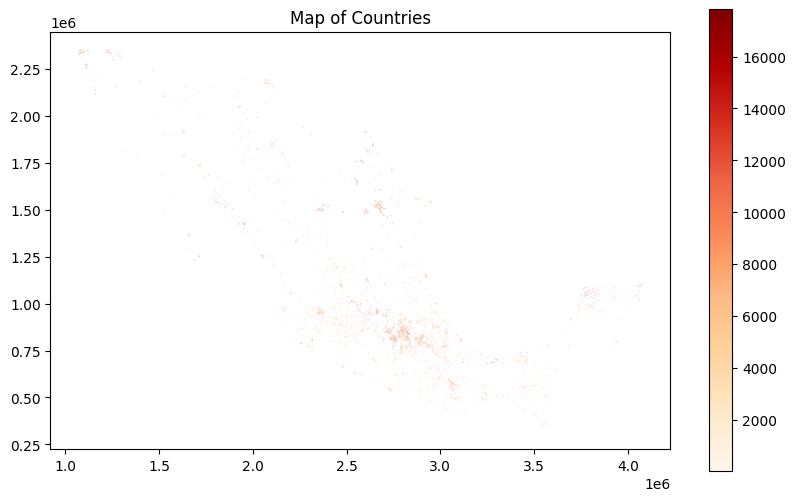

In [30]:
graph_test=map_year(republic,dummy)
graph_test.plot('count', figsize=(10,6), legend=True, cmap='OrRd')

# Optional: Add a title
plt.title("Map of Countries")

# Display the plot
plt.show()

# PCA method